# Super Market Data Project

## Import Libraries

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, PolynomialFeatures, OrdinalEncoder 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from pandas import DatetimeIndex as dt

%matplotlib inline
plt.style.use('bmh')

## Data Exploration and Preprocessing

In [2]:
### Load Data ###
supermarket = pd.read_csv('supermarket_sales.csv')

supermarket

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income             

No missing data entries

In [5]:
supermarket['gross margin percentage'].unique()

array([4.76190476])

In [165]:
supermarket['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [166]:
supermarket['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [4]:
supermarket['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [5]:
corr_matrix = supermarket.corr(method='pearson')

corr_matrix

,Unit price,Quantity,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,NaN,0.705510,-0.015815
Total,0.633962,0.705510,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [6]:
corr_matrix['gross income'].sort_values(ascending=False)

gross income               1.000000
cogs                       1.000000
Total                      1.000000
Quantity                   0.705510
Unit price                 0.633962
Rating                    -0.036442
gross margin percentage         NaN
Name: gross income, dtype: float64

In [8]:
corr_matrix['Unit price'].sort_values(ascending=False)

Unit price                 1.000000
Total                      0.633962
gross income               0.633962
cogs                       0.633962
Quantity                   0.010778
Rating                    -0.008778
gross margin percentage         NaN
Name: Unit price, dtype: float64

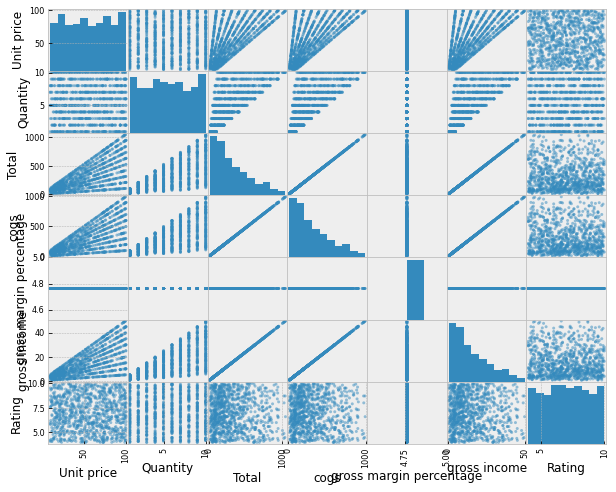

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(supermarket,figsize=(10,8));

1. The Branch and City Features are redundant, thus will drop the City feature.
2. the unique ID is not informative and will not be useful as a feature, thus it will be dropped.
3. Gross margin percentage is the exact same and will be dropped.
4. The cogs and Total just subtract to reach the gross income, thus we will drop them as they would 'dominate' the model using just subtraction.
5. The rating column has little to no correlation with any of the values we are trying to predict, and as such we will drop it

In [17]:
# dropping attributes "id", "CrossTraining", "Name", and "CATEGORY"
supermarket = supermarket.drop(['City','Invoice ID','gross margin percentage','cogs', 'Total', 'Rating'], axis=1)

supermarket

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,gross income
0,A,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,26.1415
1,C,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,3.8200
2,A,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,16.2155
3,A,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,23.2880
4,A,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,30.2085
...,...,...,...,...,...,...,...,...,...,...
995,C,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46,Ewallet,2.0175
996,B,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16,Ewallet,48.6900
997,A,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22,Cash,1.5920
998,A,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33,Cash,3.2910


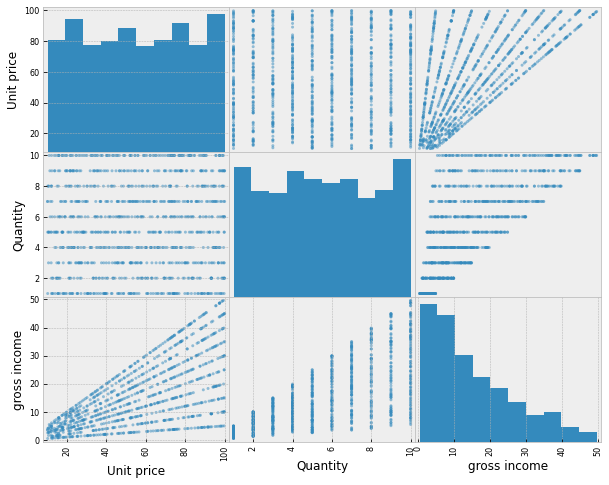

In [25]:
scatter_matrix(supermarket,figsize=(10,8));

Split into numerical and categorical dataframes

In [20]:
supermarket_num = supermarket[['Unit price','Quantity','gross income']]
supermarket_cat = supermarket[['Branch','Customer type','Date','Time','Payment','Gender','Product line']]

In [21]:
supermarket_num

,Unit price,Quantity,gross income
0,74.69,7,26.1415
1,15.28,5,3.8200
2,46.33,7,16.2155
3,58.22,8,23.2880
4,86.31,7,30.2085
...,...,...,...
995,40.35,1,2.0175
996,97.38,10,48.6900
997,31.84,1,1.5920
998,65.82,1,3.2910


In [22]:
supermarket_cat

,Branch,Customer type,Date,Time,Payment,Gender,Product line
0,A,Member,1/5/2019,13:08,Ewallet,Female,Health and beauty
1,C,Normal,3/8/2019,10:29,Cash,Female,Electronic accessories
2,A,Normal,3/3/2019,13:23,Credit card,Male,Home and lifestyle
3,A,Member,1/27/2019,20:33,Ewallet,Male,Health and beauty
4,A,Normal,2/8/2019,10:37,Ewallet,Male,Sports and travel
...,...,...,...,...,...,...,...
995,C,Normal,1/29/2019,13:46,Ewallet,Male,Health and beauty
996,B,Normal,3/2/2019,17:16,Ewallet,Female,Home and lifestyle
997,A,Member,2/9/2019,13:22,Cash,Male,Food and beverages
998,A,Normal,2/22/2019,15:33,Cash,Male,Home and lifestyle


In [24]:
 # Build a custom transformer

class AttributesOrganizer(): 
    def __init__ (self): 
        return
        
    def fit(self, X, y=None): 
        return self
    
    def transform(self, X):
        # Integer Encoding for Time of the Day
        # 1. Morning (10:00 - 11:59), 2. Afternoon (12:00 - 16:59)
        # 3. Evening (17:00 - 18:59), 4. Night (19:00 - 20:59)
        hour = pd.to_datetime(X['Time']).dt.strftime('%H').astype('float')
        hour_cat = pd.cut(hour, bins=[0., 12.0, 16.0, 18.0, np.inf], labels=[1, 2, 3, 4])
        
        # Integer Encoding for Day of the Week
        # 0. Monday, 1. Tuesday, 2. Wednesday, 3. Thursday 4. Friday, 5. Saturday, 6. Sunday
        day_of_week = pd.to_datetime(X['Date']).dt.dayofweek
        
        # Drop the original time and date attributes and add the encoded versions
        X = X.drop(['Time','Date'],axis=1)
        X['time_of_day'] = hour_cat
        X['day_of_week'] = day_of_week
        return X

In [27]:
train_data, test_data = train_test_split(supermarket, test_size=0.2, random_state=0)

train_data.shape, test_data.shape

((800, 10), (200, 10))

The following complete data preprocessing pipeline covers all encodings and processing we'll perform after dropping features and splitting the data into a training and test set. We use a one hot encoder for all the categorical features with 3 or more categories. For the binary categories we instead use integer encoding. All numerical values, besides the target values, are scaled using the StandardScaler to bring everything into a 0 to 1 numerical range. This will prevent any single feature from overloading the model due to it being of a much larger magnitude.

In [98]:
### Pipeline for predicting gross income

# Pipeline for adding encoded versions of time of day and day of week
attribute_organizer = Pipeline([('attribs_organizer', AttributesOrganizer())]) 

# List of numerical and categorical attributes (as outputted by "AttributesOrganizer")
#'Unit price',
# 'Quantity', 'Total', 'cogs', 'Rating'
#'Branch','Customer type','Date','Time','Payment','Gender','Product line'
cat_1hot_attribs = ['Branch', 'Product line','Payment','time_of_day','day_of_week']
cat_int_attribs = ['Gender','Customer type']
num_2scale_attribs = ['Quantity','Unit price']
num_orig_attribs = ['gross income']

# purposefully leaving "Invoice ID" and "gross margin percentage" out

# Pipeline for categorical attributes to be represented as one-hot encoding
cat_1hot_pipeline = Pipeline([('one_hot_encode', OneHotEncoder())])

# Pipeline for categorical attributes to be represented as integer encoding
cat_int_pipeline = Pipeline([('integer_encode', OrdinalEncoder())])

# Pipeline for numerical attributes to be scaled
num_2scale_pipeline = Pipeline([('std_scaler', StandardScaler())]) 

# Pipeline for numerical attributes to keep as original (target variables)
num_orig_pipeline = Pipeline([('missing_values',SimpleImputer(strategy='median'))]) 

# Attributes Pipeline
attributes_encoder_and_scaling = ColumnTransformer([('cat_1hot', cat_1hot_pipeline, cat_1hot_attribs),
                                                    ('cat_int', cat_int_pipeline, cat_int_attribs),
                                                    ('num_2scale', num_2scale_pipeline, num_2scale_attribs),
                                                    ('num_targets', num_orig_pipeline, num_orig_attribs)],
                                                  remainder='drop') 

# Full Pipeline (Attributes organizer followed by attributes encoder)
preprocessing_pipeline = Pipeline([('attributes', attribute_organizer),
                                  ('encod_and_scale', attributes_encoder_and_scaling)])

train_set_prepared_gross = preprocessing_pipeline.fit_transform(train_data)

In [90]:
# checking columns and whatnot
train_set_prepared_gross[:20,:4]

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [99]:
test_set_prepared_gross = preprocessing_pipeline.transform(test_data)

We will now train a multiple linear regression model with and without Lasso regularization to predict the gross income.

In [62]:
t = train_set_prepared_gross[:,-1] # gross income was left untouched in the above pipeline
X = np.delete(train_set_prepared_gross,-1,1)
train_set_prepared_gross.shape, X.shape, t.shape

((800, 28), (800, 27), (800,))

In [92]:
lin_reg = LinearRegression().fit(X,t)

# lin_reg.coef_, lin_reg.intercept_

In [96]:
joblib.dump(lin_reg, 'lin_reg_gross.pkl')

['lin_reg_gross.pkl']

In [67]:
Lasso().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [75]:
param_grid = {
    'alpha': [0.01,0.1,0.2,0.3,1.0,1.5,2.0]
}

In [93]:
lasso_grid = GridSearchCV(Lasso(),
                         param_grid=param_grid,
                         cv=5,
                         scoring='neg_mean_squared_error',
                         refit=True)

lasso_grid.fit(X,t)
lasso_grid.best_estimator_

Lasso(alpha=0.1)

In [97]:
joblib.dump(lasso_grid.best_estimator_, 'lasso_gross.pkl')

['lasso_gross.pkl']

In [84]:
# lasso_grid.best_estimator_.coef_, lasso_grid.best_estimator_.intercept_
# w = np.vstack((lasso_grid.best_estimator_.intercept_, lasso_grid.best_estimator_.coef_[:,np.newaxis]))
# w

array([[15.38471518],
       [-0.        ],
       [-0.        ],
       [ 0.        ],
       [-0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.        ],
       [ 0.        ],
       [-0.        ],
       [-0.        ],
       [ 0.        ],
       [-0.        ],
       [-0.        ],
       [ 0.02032478],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [ 0.14468844],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.        ],
       [ 0.        ],
       [ 8.10311648],
       [ 7.22662655]])

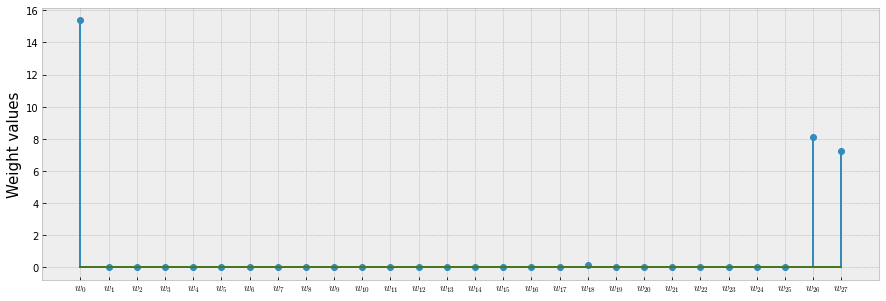

In [86]:
# plt.figure(figsize=(15,5))
# plt.stem(w)
# plt.ylabel('Weight values', size=15)
# plt.xticks(np.arange(len(w)), ['$w_{'+str(i)+'}$' for i in range(len(w))],rotation=0);

As seen from the above graph, 

In [80]:
# print(train_data.columns)

Index(['Branch', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Date', 'Time', 'Payment', 'gross income'],
      dtype='object')


We will now train a multiple linear regression model with and without Lasso regularization to predict the unit price.

In [100]:
### Pipeline for predicting Unit Price

# only need to swap gross income and Unit price

num_2scale_attribs = ['Quantity','gross income']
num_orig_attribs = ['Unit price']


train_set_prepared_unit = preprocessing_pipeline.fit_transform(train_data)

In [101]:
test_set_prepared_unit = preprocessing_pipeline.transform(test_data)

In [102]:
t = train_set_prepared_unit[:,-1] # gross income was left untouched in the above pipeline
X = np.delete(train_set_prepared_unit,-1,1)
train_set_prepared_unit.shape, X.shape, t.shape

((800, 28), (800, 27), (800,))

In [103]:
lin_reg_unit = LinearRegression().fit(X,t)

joblib.dump(lin_reg_unit, 'lin_reg_unit.pkl')

['lin_reg_unit.pkl']

In [104]:
param_grid = {
    'alpha': [0.01,0.1,0.2,0.3,1.0,1.5,2.0]
}

In [105]:
lasso_grid_unit = GridSearchCV(Lasso(),
                         param_grid=param_grid,
                         cv=5,
                         scoring='neg_mean_squared_error',
                         refit=True)

lasso_grid_unit.fit(X,t)
lasso_grid_unit.best_estimator_

Lasso(alpha=0.1)

In [142]:
joblib.dump(lasso_grid_unit.best_estimator_, 'lasso_unit.pkl')

['lasso_unit.pkl']

We will now train a logistic regression classifier to classify gender.
The dataset will be limited to only rows from Branch C, and only the following features:
- gender
- product line
- payment
- gross income

In [158]:
cat_1hot_attribs = ['Product line','Payment']
num_2scale_attribs = ['gross income']

attributes_encoder_and_scaling_gender = ColumnTransformer([('cat_1hot', cat_1hot_pipeline, cat_1hot_attribs),
                                                           ('num_2scale', num_2scale_pipeline, num_2scale_attribs)],
                                                            remainder='drop')

X = attributes_encoder_and_scaling_gender.fit_transform(train_data[train_data['Branch']=='C'])
t = train_data[train_data['Branch']=='C']['Gender']
X.shape, t.shape

((259, 10), (259,))

In [159]:
test_data_prepared_gender = attributes_encoder_and_scaling_gender.transform(test_data[test_data['Branch']=='C'])

In [160]:
log_poly_reg = Pipeline([('poly_feat', PolynomialFeatures(degree=2, interaction_only=True)),
                           ('log_reg', LogisticRegression())])

log_poly_reg

Pipeline(steps=[('poly_feat', PolynomialFeatures(interaction_only=True)),
                ('log_reg', LogisticRegression())])

In [161]:
log_poly_reg.get_params()

{'memory': None,
 'steps': [('poly_feat', PolynomialFeatures(interaction_only=True)),
  ('log_reg', LogisticRegression())],
 'verbose': False,
 'poly_feat': PolynomialFeatures(interaction_only=True),
 'log_reg': LogisticRegression(),
 'poly_feat__degree': 2,
 'poly_feat__include_bias': True,
 'poly_feat__interaction_only': True,
 'poly_feat__order': 'C',
 'log_reg__C': 1.0,
 'log_reg__class_weight': None,
 'log_reg__dual': False,
 'log_reg__fit_intercept': True,
 'log_reg__intercept_scaling': 1,
 'log_reg__l1_ratio': None,
 'log_reg__max_iter': 100,
 'log_reg__multi_class': 'auto',
 'log_reg__n_jobs': None,
 'log_reg__penalty': 'l2',
 'log_reg__random_state': None,
 'log_reg__solver': 'lbfgs',
 'log_reg__tol': 0.0001,
 'log_reg__verbose': 0,
 'log_reg__warm_start': False}

In [162]:
param_grid = {
    'log_reg__penalty': ['none','l2'],
    'log_reg__solver': ['lbfgs','saga']
}

In [163]:
log_grid = GridSearchCV(log_poly_reg,
                        param_grid=param_grid,                           
                        cv=5,                           
                        scoring='neg_mean_squared_error',                           
                        refit=True)

log_grid.fit(X, t)
log_grid.best_estimator_

Pipeline(steps=[('poly_feat', PolynomialFeatures(interaction_only=True)),
                ('log_reg', LogisticRegression(penalty='none'))])

In [164]:
joblib.dump(log_grid.best_estimator_, 'log_poly_gender.pkl')

['log_poly_gender.pkl']

We will now train a logistic regression classifier to classify customer type.
The dataset will be limited to only rows from Branch C, and only the following features:
- customer type
- gender
- day
- timeslot

In [133]:
cat_1hot_attribs = ['time_of_day','day_of_week']
cat_int_attribs = ['Gender']

attribute_organizer = Pipeline([('attribs_organizer', AttributesOrganizer())])

attributes_encoder_and_scaling_gender = ColumnTransformer([('cat_1hot', cat_1hot_pipeline, cat_1hot_attribs),
                                                           ('cat_int', cat_int_pipeline, cat_int_attribs)],
                                                            remainder='drop')

preprocessing_pipeline_cust = Pipeline([('attributes', attribute_organizer),
                                        ('encod_and_scale', attributes_encoder_and_scaling_gender)])

X = preprocessing_pipeline_cust.fit_transform(train_data[train_data['Branch']=='C'])
t = train_data[train_data['Branch']=='C']['Customer type']
X.shape, t.shape

((259, 12), (259,))

In [134]:
log_grid = GridSearchCV(log_poly_reg,
                        param_grid=param_grid,                           
                        cv=5,                           
                        scoring='neg_mean_squared_error',                           
                        refit=True)

log_grid.fit(X, t)
log_grid.best_estimator_

Pipeline(steps=[('poly_feat', PolynomialFeatures(interaction_only=True)),
                ('log_reg', LogisticRegression(penalty='none'))])

In [135]:
joblib.dump(log_grid.best_estimator_, 'log_poly_cust.pkl')

['log_poly_cust.pkl']

We will now train a classifier to predict the day of purchase

In [137]:
cat_1hot_attribs = ['Branch', 'Product line','Payment','time_of_day']
cat_int_attribs = ['Gender','Customer type']
num_2scale_attribs = ['Quantity','Unit price']
num_orig_attribs = ['gross income']

X = preprocessing_pipeline.fit_transform(train_data)
t = pd.to_datetime(train_data['Date']).dt.dayofweek
X.shape, t.shape

((800, 28), (800,))

In [138]:
# First we will train a Logistic regression model to predict the day of the purchase
param_grid = {
    'penalty': ['none','l2'],
    'solver': ['lbfgs','saga']
}

log_grid = GridSearchCV(LogisticRegression(),
                        param_grid=param_grid,                           
                        cv=5,                           
                        scoring='neg_mean_squared_error',                           
                        refit=True)

log_grid.fit(X, t)
log_grid.best_estimator_

LogisticRegression(penalty='none')

In [139]:
joblib.dump(log_grid.best_estimator_, 'log_day.pkl')

['log_day.pkl']

In [140]:
# Second we will train a GradientBoostingClassifier to predict the day of the purchase
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'learning_rate': [0.001,0.01,0.1,0.5],
    'n_estimators': [100,200,300,400],
    'subsample':[0.5,0.75,1.0]
}

grad_grid = GridSearchCV(GradientBoostingClassifier(),
                        param_grid=param_grid,                           
                        cv=5,                           
                        scoring='neg_mean_squared_error',                           
                        refit=True)

grad_grid.fit(X, t)
grad_grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.001, subsample=0.5)

In [141]:
joblib.dump(grad_grid.best_estimator_, 'grad_day.pkl')

['grad_day.pkl']